<a href="https://colab.research.google.com/github/Mahesh3146/Data-Analysis-Projects/blob/main/Uber_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# extracting the data from the drive

uber_15 = pd.read_csv('/content/uber-raw-data-janjune-15.csv')

In [3]:
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141.0
1,B02617,2015-05-17 09:47:00,B02617,65.0
2,B02617,2015-05-17 09:47:00,B02617,100.0


In [4]:
# we will find  the structure of data

uber_15.shape

(189929, 4)

In [5]:
# we are checking the duplicates 

uber_15.duplicated().sum()

13695

In [6]:
# we are removing the duplicates from the data

uber_15.drop_duplicates(inplace = True)

In [7]:
# verifying that is there any duplicates are exist

uber_15.duplicated().sum()

0

#**Task 1 :To Analysing which month have maximum Uber pickups ?**

In [8]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141.0
1,B02617,2015-05-17 09:47:00,B02617,65.0
2,B02617,2015-05-17 09:47:00,B02617,100.0
3,B02617,2015-05-17 09:47:00,B02774,80.0
4,B02617,2015-05-17 09:47:00,B02617,90.0


In [9]:
# The Pickup date is in object type

uber_15.dtypes

Dispatching_base_num     object
Pickup_date              object
Affiliated_base_num      object
locationID              float64
dtype: object

In [10]:
# so we are converting the date from object type into datetime

uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'],format='%Y-%m-%d %H:%M:%S')

In [11]:
# we verifying that pickup_date is convert to object to datetime
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                     float64
dtype: object

In [12]:
# we are extracting the "Month" from pickup-date

uber_15['Month'] = uber_15['Pickup_date'].dt.month

In [13]:
# we are counts the pickups in every months
uber_15['Month'].value_counts()

1    44833
5    41027
3    37853
4    21545
6    19758
2    11218
Name: Month, dtype: int64

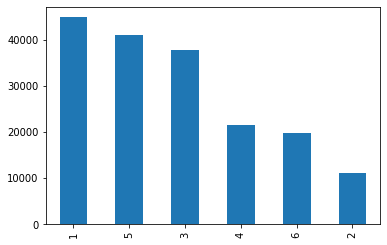

In [14]:
# we are visualizing the Maximum and  Minimum Pick_ups in each Month using Bar Chart

uber_15['Month'].value_counts().plot(kind = 'bar')

([<matplotlib.patches.Wedge at 0x7fe296254590>,
 [Text(0.7670047451531109, 0.7884819090585474, 'Mar'),
  Text(-0.7569926196895859, 0.7980991001971487, 'Jan'),
  Text(-0.9113887444332583, -0.615930642621691, 'Jun'),
  Text(0.09049075855332439, -1.096271600752498, 'Apr'),
  Text(0.8032355423886791, -0.7515401941636686, 'Feb'),
  Text(1.0780787287379014, -0.21850916375033383, 'Jun')])

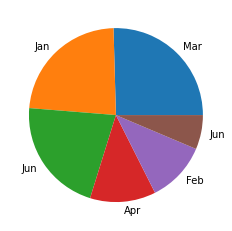

In [15]:
# we are visualizing the Maximum and  Minimum Pick_ups in each Month using PIE chart

plt.pie(uber_15['Month'].value_counts(),labels = ['Mar','Jan','Jun','Apr','Feb','Jun'])

# **Task 2 : Find out Total trips for each month & each weekdays ?**

In [16]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month
0,B02617,2015-05-17 09:47:00,B02617,141.0,5
1,B02617,2015-05-17 09:47:00,B02617,65.0,5
2,B02617,2015-05-17 09:47:00,B02617,100.0,5
3,B02617,2015-05-17 09:47:00,B02774,80.0,5
4,B02617,2015-05-17 09:47:00,B02617,90.0,5


In [17]:
# we are extracting the day_names stored in separate feature

uber_15['WeekDay'] = uber_15['Pickup_date'].dt.day_name()

In [18]:
# we are extracting the "day","hour","minute" stored in separate features

uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [19]:
# this is a new updated uber data

uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,WeekDay,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141.0,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65.0,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100.0,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80.0,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90.0,5,Sunday,17,9,47


In [20]:
# we are grouping the "Months","WeekDay" and their size in new Dataframe

temp =uber_15.groupby(['Month','WeekDay'],as_index=False).size()

In [21]:
# this is new dataframe
temp.head()

,Month,WeekDay,size
0,1,Friday,2273
1,1,Monday,12093
2,1,Saturday,10428
3,1,Sunday,936
4,1,Thursday,7269


In [22]:
temp['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [23]:
dict_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'}

In [24]:
temp['Month'] = temp['Month'].map(dict_month)

In [25]:
# we are replacing the months unique numbers in to the months names

temp.head()


,Month,WeekDay,size
0,Jan,Friday,2273
1,Jan,Monday,12093
2,Jan,Saturday,10428
3,Jan,Sunday,936
4,Jan,Thursday,7269


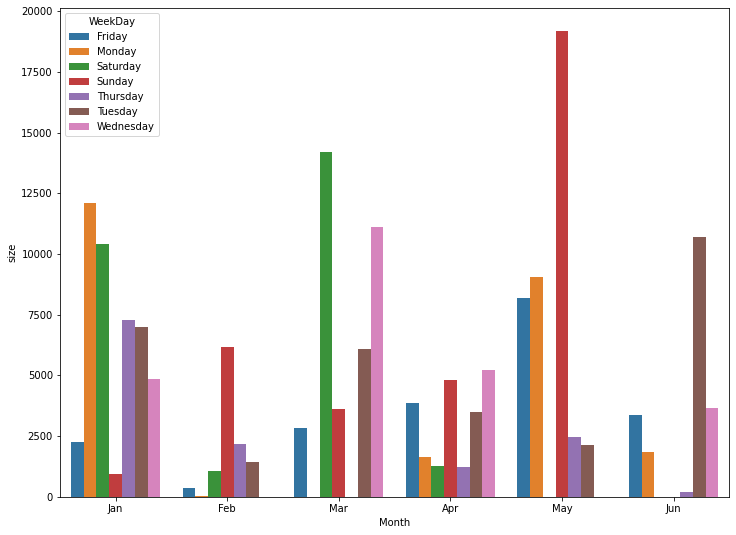

In [26]:
# we are visualizing the Total trips for each month & weekdays using "grouped Bar chart"

plt.figure(figsize=(12,9))
sns.barplot(x = 'Month',y = 'size',hue='WeekDay',data = temp)

# **Task 3 : Analysing Hourly Rush in New York city on all days?**

In [28]:
# this my uber data

uber_15.head()


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,WeekDay,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141.0,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65.0,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100.0,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80.0,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90.0,5,Sunday,17,9,47


In [32]:
# we are extracting the "WeekDay","hour" features and stored in separate DataFrame

summary = uber_15.groupby(['WeekDay','hour'],as_index = False).size()

In [33]:
# we are checking the new dataframe
summary.head()

,WeekDay,hour,size
0,Friday,0,92
1,Friday,1,56
2,Friday,2,25
3,Friday,3,17
4,Friday,4,22


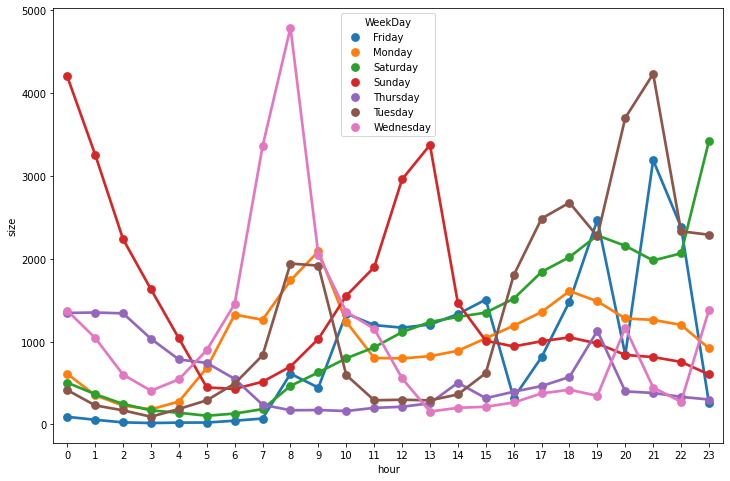

In [36]:
# we are visualizing the Hourly Rush in New York city on All Days using PointPLot Chart

plt.figure(figsize=(12,8))
sns.pointplot(x = summary['hour'],y = summary['size'],hue = summary['WeekDay'],data = summary)

# **Task 4 : Analysing which Base-number has most Active Vehicles ?**

In [37]:
# we are collecting the uber_foil data from drive

uber_foil = pd.read_csv("/content/Uber-Jan-Feb-FOIL.csv")

In [38]:
# checking the uber_foil data

uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


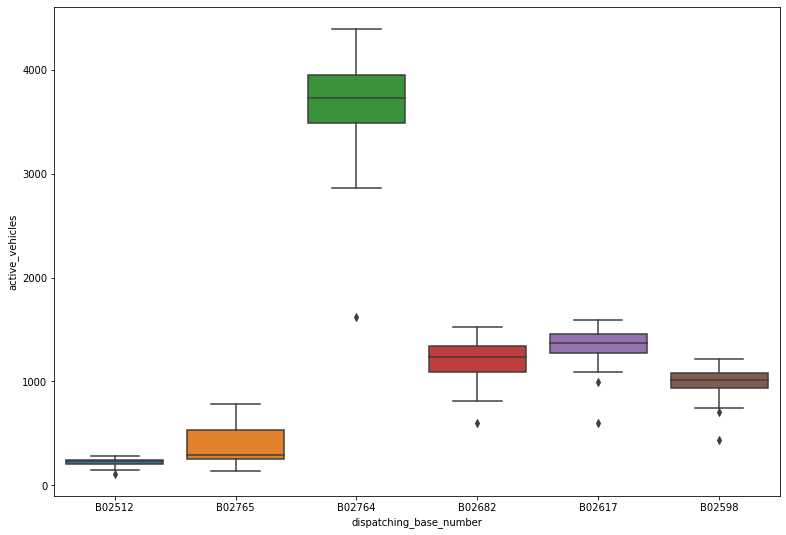

In [59]:
#visualizing the which Base-number has most Active Vehicles using Boxplot Chart

plt.figure(figsize = (13,9))
sns.boxplot(x ='dispatching_base_number',y = 'active_vehicles',data = uber_foil)

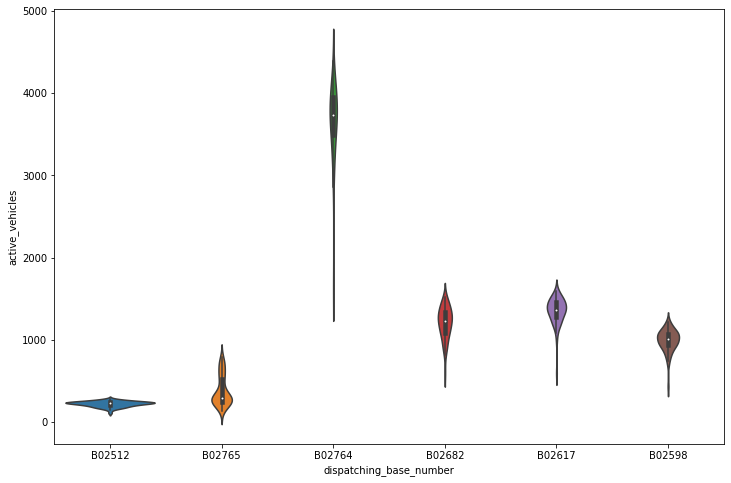

In [61]:
#visualizing the which Base-number has most Active Vehicles using Violen Chart
plt.figure(figsize = (12,8))
sns.violinplot(x ='dispatching_base_number',y = 'active_vehicles',data = uber_foil)